CSE 5243 

# Lab1, Exploratory Data Analysis

Jan. 28th, 2018

## Understand the Data in Context

The targe data was collected from the census bureau database to predict whether a person's income is over 50k or not. Each record in the database represents one person in the survey. Data mining tries to find the relations between the data and make the prediction based on those relations. Marital status may also be predicted based on these data. I may calculate a new ordinary variable using the age and the income and find its relation to marital status.  If the model or the algorithm derived from the training data is able to predict the test data (or other samples), we can tell we have mined useful data.

## Understand the Data


### Describe Attributes

* Age: Age is a discrete interval attribute, which simply represents the suject's age in years.

* Workclass: Workclass is a nominal attribute, which shows the workclass conditon of the subjects.

* fnlwgt: fnlwgt means final weight. The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. This is a continuous attribute.

* education: education is a ordinal attribute representing how much education the subject received.

* marital-status: A nominal attribute, quite self-explanatory of showing the subject's marital status.

* occupation: A nominal attribute.

* relationship: A nominal attribute. This attribute shows the subject's role in the relationship.

* sex: A nominal attribute expressed in male and female.

* capital-gain: A continuous attribute showing the amount of the capital gain of the subject.

* capital-loss: A continuous attribute showing the amount of the capital loss of the subject.

* hours-per-week: A continuous ratio attribute, which records how many hours the subject work every week.

- native-country: A nominal attribute representing the native country of the subject.


### Verify Data Quality


In [1]:
import pandas as pd
import numpy as np
Labels =["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
               "occupation", "relationship", "race", "sex", "capital-gain",
               "capital-loss", "hours-per-week", "native-country", "prediction"]
db=pd.read_csv("lab1/adult.data",header=None, names=Labels, sep=',\s', na_values=["?"],engine='python')


#### Duplicated Values

In [2]:
db[db.duplicated()]
db=db.drop_duplicates()

As we can see, there are duplicated data. I decided to remove those duplicated values.

#### Missing Values

In [3]:
db[db.isna().any(axis=1)]
db=db.dropna(how='any')

There are 2398 lines with at least 1 missing value. They are removed from the database.

#### Outlier
There is no reason to exclude any outliers.

### Basic statistics

In [4]:
db['hours-per-week'].mode()

0    40
dtype: int64

In [5]:
db['hours-per-week'].mean()

40.934702544875414

In [6]:
db['hours-per-week'].median()

40.0

In [7]:
db['hours-per-week'].max()

99

In [8]:
db['hours-per-week'].min()

1

In [9]:
db['hours-per-week'].std()

11.97875313756356

In [10]:
db['hours-per-week'].value_counts()

40    14239
50     2716
45     1752
60     1405
35     1183
20     1054
30      988
55      671
25      574
48      493
38      456
15      346
70      276
65      241
32      238
10      219
24      217
42      213
44      209
36      202
16      180
43      146
37      145
12      137
52      135
80      120
8       102
56       90
46       80
99       78
      ...  
64       14
51       13
85       13
68       12
98       11
63        9
11        9
78        8
1         7
77        6
31        5
96        5
29        5
59        4
67        4
91        3
76        3
81        3
73        2
89        2
95        2
97        2
88        2
86        2
61        2
94        1
87        1
74        1
82        1
92        1
Name: hours-per-week, Length: 94, dtype: int64

According to the basic statistics of the attribute "hours per week", we can see the mode and the mediem are both 40 = 5 * 8 which is the enforced by the law. The value counts shows that nearly half of the sujects work 8 hours every day. The maxium and the minium value is 99 and 1. Maybe this is the upper and lower bound that the subject can choose from. It is interesting that 78 subjects choose "99", which means they work for more than 14 hours every day even if they work 7 days a week.(Note that this maybe the largest number the subject may choose.) However, it is possible that some subjects choose the answer mind-absently or choose 99 to show they work a lot without calculating the accurate number.

### Visualization between Numeric

In [11]:
db['hours-per-week'].plot(kind="box")

Among the hours-work per week, the frequency is centrulized to 40 = 5 * 8 hours.

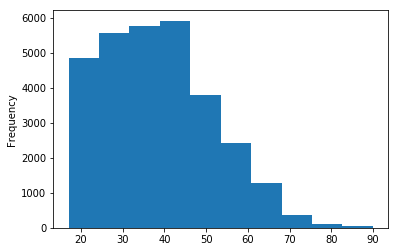

In [12]:
db['age'].plot(kind='hist')

The subject is choosen mostly from 20 to 50, however there are some people over 80-year-old are still working.

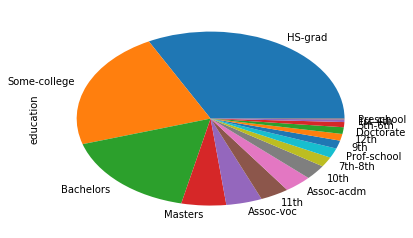

In [13]:
db['education'].value_counts().plot(kind='pie')

The portion of people not finishing there collage degree is much lager than my expection.

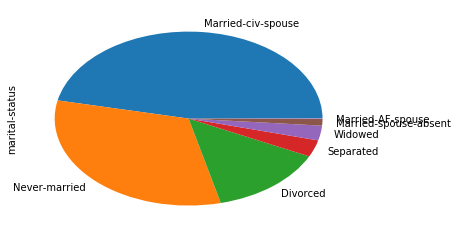

In [14]:
db['marital-status'].value_counts().plot(kind='pie')

More than half of the working people are actually single.(This is reasonable considering the youngest survey subjects are 20ish.)

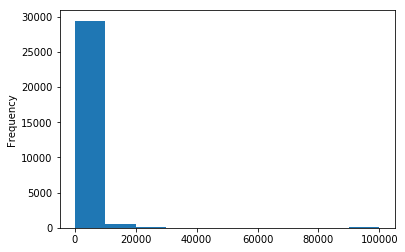

In [15]:
db['capital-gain'].plot(kind="hist")

There are a few people gain around 100k through invesment.

### Relationships

In [16]:
db.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076279,0.043203,0.080162,0.060141,0.101348
fnlwgt,-0.076279,1.000000,-0.045199,0.000420,-0.009755,-0.023033
education-num,0.043203,-0.045199,1.000000,0.124455,0.079613,0.152842
capital-gain,0.080162,0.000420,0.124455,1.000000,-0.032255,0.080429
capital-loss,0.060141,-0.009755,0.079613,-0.032255,1.000000,0.052380
hours-per-week,0.101348,-0.023033,0.152842,0.080429,0.052380,1.000000


The only 3 correlations over 0.1 is between age & hours-per-week, education-num & hours-per-week and education-num & capital-gain. These three correlations are all positive and weak.

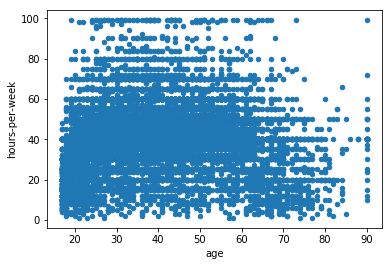

In [17]:
db.plot.scatter('age','hours-per-week')

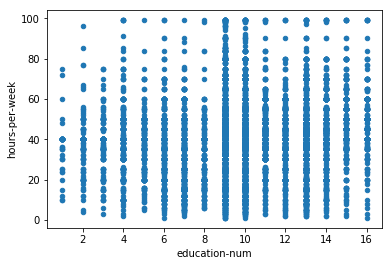

In [18]:
db.plot.scatter('education-num','hours-per-week')

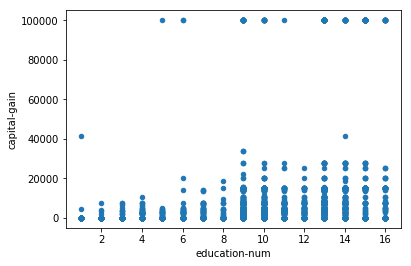

In [19]:
db.plot.scatter('education-num','capital-gain')

No significant relationship can be observed in plot 1 and 2. However in plot 3 we can see that between education number 2 and 9, the captical gain is increasing with the education number, which means people with higher education (up to 9 years) will earn more money in the investment.

### Relationship by Class

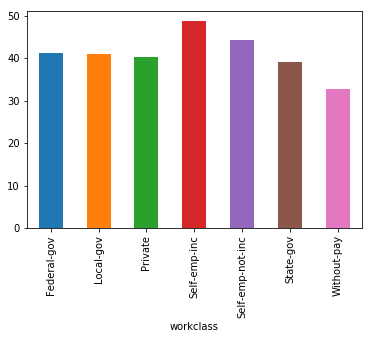

In [20]:
db.groupby('workclass').mean()['hours-per-week'].plot(kind='bar')

People in goverments or privately work strictly 40 hours a week. However, people who is self-employed or works with-out pay are have more freedom about working hours.

### Add Attributes

In [21]:
def conv(age):
    if age<=25 :
        return '<=25'
    if age<=35 :
        return '<=35'
    if age<=45 :
        return '<=45'
    if age<=55 :
        return '<=55'
    elif age>55:
        return '>55'
    
db['age_range']=db['age'].apply(conv)

In [22]:
db['age_range']

0        <=45
1        <=55
2        <=45
3        <=55
4        <=35
5        <=45
6        <=55
7        <=55
8        <=35
9        <=45
10       <=45
11       <=35
12       <=25
13       <=35
15       <=35
16       <=25
17       <=35
18       <=45
19       <=45
20       <=45
21       <=55
22       <=35
23       <=45
24        >55
25        >55
26       <=25
28       <=45
29       <=55
30       <=25
31       <=25
         ... 
32526    <=35
32527    <=25
32528    <=35
32529    <=35
32532    <=35
32533    <=55
32534    <=45
32535    <=25
32536    <=35
32537    <=35
32538    <=45
32540    <=45
32543    <=45
32544    <=35
32545    <=45
32546    <=45
32547    <=45
32548     >55
32549    <=45
32550    <=45
32551    <=35
32552    <=45
32553    <=35
32554    <=55
32555    <=25
32556    <=35
32557    <=45
32558     >55
32559    <=25
32560    <=55
Name: age_range, Length: 30139, dtype: object

Attribute age can be changed into a class attribute, so that some analyze can be done within the certain age range.

## Exceptional Work

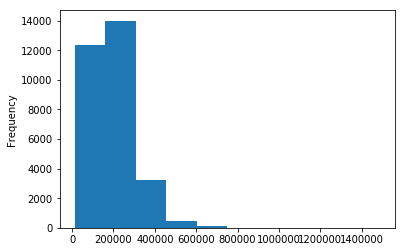

In [23]:
db['fnlwgt'].plot(kind='hist')

In [24]:
def fnl(wgt):
    if wgt<313769:
        return int((wgt-13769)/10000)
    elif wgt<613769:
        return int((wgt-313769)/75000+30)
    else:
        return 34
db['fnl']=db['fnlwgt'].apply(fnl)
db2=db.groupby('fnl').mean()
del db2['fnlwgt']
db2.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.676279,0.174163,0.364626,0.432238
education-num,0.676279,1.000000,0.169688,0.588376,0.490416
capital-gain,0.174163,0.169688,1.000000,0.272978,-0.011535
capital-loss,0.364626,0.588376,0.272978,1.000000,0.270576
hours-per-week,0.432238,0.490416,-0.011535,0.270576,1.000000


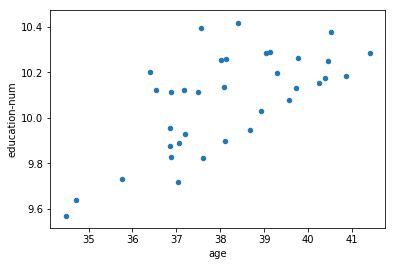

In [25]:
db2.plot.scatter('age','education-num')

Consider the attribute fnlwgt, it is found that fnlwgt is not evenly distributed. So in order to group the data set according to "fnlwgt", the fnl function is used to convert the fnlwgt into fnl, which are intergers with approximately the same amount of subjects sharing the same number. And then group the dataset by "fnl". Because the fnlwgt represents the demographic characteristics of the subjects, people in the same group are similar in the demographic characteristics. The mean values of the non-class attributes are calcuated and form a new data frame "db2". In the correlation matrix of the "db2", we can find some string correlations.

Viewing the scatter plot, the age is positively correlated to the education-num. This means that amoung all demographic groups, the group with a lower average working age tends to have a lower years of education. Apparently, there are some demographic factor that is correlated to both of these two variables.  